In [ ]:
# BINARY MM

In [ ]:
#!pip3 install pandas

In [ ]:
#!pip3 install seaborn

In [7]:
## Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, ParameterGrid
from stepmix.bootstrap import blrt_sweep
from stepmix.stepmix import StepMix
from stepmix.utils import get_mixed_descriptor

In [3]:
# Load data 

# MEASUREMENT MODEL

# BINARY MM
X_bin = pd.read_csv('../data/Xbin.csv', index_col=0)

In [4]:
# Load data 

# STRUCTURAL MODEL
Z = pd.read_csv('../data/Z.csv', index_col = 0)

# The covariate model as an internal optimization procedure
# We can specify additional arguments such as the learning rate
# and the optimization method
opt_params = {
    'method': 'newton-raphson',  # Can also be "gradient",
    'intercept': True,
    'max_iter': 1,  # Number of opt. step each time we update the covariate model
}

In [5]:
# Set ups
k = 5  # number of classes
m = 3000 # maximum number iterations
r = 5 # number of times to estimate models (nrep > 1 automates search for global max)

# random seed
seed = 240792

In [6]:
# Define base model for BINARY w/o covariates (1-step)
binary_base1 = StepMix(
    n_components = 5, 
    n_steps = 1,
    measurement = 'binary_nan',   
    verbose = 1, 
    n_init = 1,
    max_iter = m,
    random_state = seed)

binary_base1.fit(X_bin)

Fitting StepMix...


Initializations (n_init) : 100%|████████████████| 1/1 [00:25<00:00, 25.66s/it, max_LL=-1.74e+5, max_avg_LL=-2.73]

MODEL REPORT
    Measurement model parameters
          model_name     binary_nan                                
          class_no                0       1       2       3       4
          param variable                                           
          pis   clo_lca      0.0303  0.9808  0.4988  0.7998  0.1062
                cnf_lca      0.2060  0.3105  0.3547  0.0744  0.7518
                cnt_lca      0.0238  0.9847  0.8573  0.4809  0.6754
                mon_lca      0.0031  0.3790  0.0000  0.0537  0.3548
                sup_lca      0.0839  0.9771  0.1681  0.6505  0.7229
                tra_lca      0.1737  0.6195  0.6946  0.2165  0.5278
    Class weights
        Class 1 : 0.60
        Class 2 : 0.17
        Class 3 : 0.09
        Class 4 : 0.09
        Class 5 : 0.04
    Fit for 5 latent classes
    Estimation method             : 1-step
    Number of observations        : 63672
    Number of latent classes      : 5
    Number of estimated parameters: 34
    Log-likelihood

StepMix(max_iter=3000, measurement='binary_nan', n_components=5,
        random_state=240792, verbose=1)

In [7]:
# Define base model for BINARY w/o covariates (2-step)
binary_base2 = StepMix(
    n_components = 5, 
    n_steps = 2,
    measurement = 'binary_nan',   
    verbose = 1, 
    n_init = 1,
    max_iter = m,
    random_state = seed)

binary_base2.fit(X_bin)

Fitting StepMix...


Initializations (n_init) : 100%|████████████████| 1/1 [00:24<00:00, 24.63s/it, max_LL=-1.74e+5, max_avg_LL=-2.73]

MODEL REPORT
    Measurement model parameters
          model_name     binary_nan                                
          class_no                0       1       2       3       4
          param variable                                           
          pis   clo_lca      0.0303  0.9808  0.4988  0.7998  0.1062
                cnf_lca      0.2060  0.3105  0.3547  0.0744  0.7518
                cnt_lca      0.0238  0.9847  0.8573  0.4809  0.6754
                mon_lca      0.0031  0.3790  0.0000  0.0537  0.3548
                sup_lca      0.0839  0.9771  0.1681  0.6505  0.7229
                tra_lca      0.1737  0.6195  0.6946  0.2165  0.5278
    Class weights
        Class 1 : 0.60
        Class 2 : 0.17
        Class 3 : 0.09
        Class 4 : 0.09
        Class 5 : 0.04
    Fit for 5 latent classes
    Estimation method             : 2-step
    Number of observations        : 63672
    Number of latent classes      : 5
    Number of estimated parameters: 34
    Log-likelihood

StepMix(max_iter=3000, measurement='binary_nan', n_components=5, n_steps=2,
        random_state=240792, verbose=1)

In [ ]:
# Define base model for BINARY w/o covariates (3-step, ML)
binary_base3ml = StepMix(
    n_components = 5, 
    n_steps = 3,
    correction = 'ML',
    measurement = 'binary_nan',   
    verbose = 1, 
    n_init = r,
    max_iter = m,
    random_state = seed)

binary_base3ml.fit(X_bin)

In [ ]:
# COMPARE: MM with and without covariates (3-step)

# Define model for BINARY with covariates (3-step, ML)
binary_cov3ml = StepMix(
    n_components = 5, 
    n_steps = 3,
    correction = 'ML',
    measurement = 'binary_nan',   
    structural = 'covariate', 
    structural_params = opt_params,
    verbose = 1, 
    n_init = r,
    max_iter = m,
    random_state = seed)

binary_cov3ml.fit(X_bin, Z)

In [12]:
binary_base3ml

StepMix(max_iter=3000, measurement='binary_nan', n_components=5,
        random_state=240792, verbose=1)

In [17]:
# HOW MANY CLASSES? -- MIXED 

# Loop over number of classes (3-step ML)
result_binary_numcl = dict(number=[], log_likelihood=[], caic=[], abic=[], relative_entropy=[])

for n in [1, 2, 3, 4, 5, 6, 7, 8]:
    # Create a new StepMix instance for each n
    binary_base3ml = StepMix(
        n_components=n, 
        n_steps=3,
        correction='ML',
        measurement='binary_nan',   
        verbose=1, 
        n_init=r,
        max_iter=m,
        random_state=seed
    )
    
    # Fit the model
    binary_base3ml.fit(X_bin)
    
    # Get log-likelihood
    ll = binary_base3ml.score(X_bin)

    # Get cAIC
    caic = binary_base3ml.caic(X_bin)

    # Get sBIC
    abic = binary_base3ml.sabic(X_bin)

    # Get relative entropy
    rel_entr = binary_base3ml.relative_entropy(X_bin)
    
    # Store results
    result_binary_numcl['number'].append(n)
    result_binary_numcl['log_likelihood'].append(ll)
    result_binary_numcl['caic'].append(caic)
    result_binary_numcl['abic'].append(abic)
    result_binary_numcl['relative_entropy'].append(rel_entr)


Fitting StepMix...


Initializations (n_init) : 100%|████████████████| 5/5 [00:00<00:00, 38.69it/s, max_LL=-2.09e+5, max_avg_LL=-3.29]


MODEL REPORT
    Measurement model parameters
          model_name     binary_nan
          class_no                0
          param variable           
          pis   clo_lca      0.3072
                cnf_lca      0.2484
                cnt_lca      0.3312
                mon_lca      0.0856
                sup_lca      0.3219
                tra_lca      0.3293
    Class weights
        Class 1 : 1.00
    Fit for 1 latent classes
    Estimation method             : 3-step
    Correction method             : ML
    Assignment method             : modal
    Number of observations        : 63672
    Number of latent classes      : 1
    Number of estimated parameters: 6
    Log-likelihood (LL)           : -209298.4171
    -2LL                          : 418596.8343
    Average LL                    : -3.2871
    AIC                           : 418608.83
    BIC                           : 418663.20
    CAIC                          : 418669.20
    Sample-Size Adjusted BIC      : 418

Initializations (n_init) : 100%|████████████████| 5/5 [00:03<00:00,  1.54it/s, max_LL=-1.76e+5, max_avg_LL=-2.77]


MODEL REPORT
    Measurement model parameters
          model_name     binary_nan        
          class_no                0       1
          param variable                   
          pis   clo_lca      0.8261  0.0589
                cnf_lca      0.3142  0.2169
                cnt_lca      0.8793  0.0690
                mon_lca      0.2522  0.0059
                sup_lca      0.7854  0.1001
                tra_lca      0.5584  0.2004
    Class weights
        Class 1 : 0.32
        Class 2 : 0.68
    Fit for 2 latent classes
    Estimation method             : 3-step
    Correction method             : ML
    Assignment method             : modal
    Number of observations        : 63672
    Number of latent classes      : 2
    Number of estimated parameters: 13
    Log-likelihood (LL)           : -176187.9100
    -2LL                          : 352375.8200
    Average LL                    : -2.7671
    AIC                           : 352401.82
    BIC                           :

Initializations (n_init) : 100%|████████████████| 5/5 [01:46<00:00, 21.21s/it, max_LL=-1.75e+5, max_avg_LL=-2.75]


MODEL REPORT
    Measurement model parameters
          model_name     binary_nan                
          class_no                0       1       2
          param variable                           
          pis   clo_lca      0.0583  0.4996  0.8537
                cnf_lca      0.2090  0.3343  0.3069
                cnt_lca      0.0108  0.8960  0.8744
                mon_lca      0.0067  0.0468  0.3093
                sup_lca      0.1026  0.1034  0.9998
                tra_lca      0.1797  0.5698  0.5363
    Class weights
        Class 1 : 0.63
        Class 2 : 0.12
        Class 3 : 0.24
    Fit for 3 latent classes
    Estimation method             : 3-step
    Correction method             : ML
    Assignment method             : modal
    Number of observations        : 63672
    Number of latent classes      : 3
    Number of estimated parameters: 20
    Log-likelihood (LL)           : -174874.3151
    -2LL                          : 349748.6302
    Average LL                

Initializations (n_init) : 100%|████████████████| 5/5 [03:59<00:00, 47.81s/it, max_LL=-1.74e+5, max_avg_LL=-2.74]


MODEL REPORT
    Measurement model parameters
          model_name     binary_nan                        
          class_no                0       1       2       3
          param variable                                   
          pis   clo_lca      0.4952  0.0465  0.8895  0.4387
                cnf_lca      0.3408  0.2088  0.3149  0.1994
                cnt_lca      0.8734  0.0095  1.0000  0.0000
                mon_lca      0.0468  0.0045  0.3474  0.1019
                sup_lca      0.2133  0.0474  1.0000  0.9037
                tra_lca      0.5602  0.1751  0.5675  0.2528
    Class weights
        Class 1 : 0.15
        Class 2 : 0.58
        Class 3 : 0.20
        Class 4 : 0.07
    Fit for 4 latent classes
    Estimation method             : 3-step
    Correction method             : ML
    Assignment method             : modal
    Number of observations        : 63672
    Number of latent classes      : 4
    Number of estimated parameters: 27
    Log-likelihood (LL)         

Initializations (n_init) : 100%|████████████████| 5/5 [02:48<00:00, 33.70s/it, max_LL=-1.74e+5, max_avg_LL=-2.73]


MODEL REPORT
    Measurement model parameters
          model_name     binary_nan                                
          class_no                0       1       2       3       4
          param variable                                           
          pis   clo_lca      0.0303  0.9808  0.4988  0.7998  0.1062
                cnf_lca      0.2060  0.3105  0.3547  0.0744  0.7518
                cnt_lca      0.0238  0.9847  0.8573  0.4809  0.6754
                mon_lca      0.0031  0.3790  0.0000  0.0537  0.3548
                sup_lca      0.0839  0.9771  0.1681  0.6505  0.7229
                tra_lca      0.1737  0.6195  0.6946  0.2165  0.5278
    Class weights
        Class 1 : 0.60
        Class 2 : 0.17
        Class 3 : 0.09
        Class 4 : 0.09
        Class 5 : 0.04
    Fit for 5 latent classes
    Estimation method             : 3-step
    Correction method             : ML
    Assignment method             : modal
    Number of observations        : 63672
    Number of 

Initializations (n_init) : 100%|████████████████| 5/5 [05:17<00:00, 63.48s/it, max_LL=-1.74e+5, max_avg_LL=-2.73]


MODEL REPORT
    Measurement model parameters
          model_name     binary_nan                                        
          class_no                0       1       2       3       4       5
          param variable                                                   
          pis   clo_lca      0.9278  0.1073  0.5813  0.0813  0.0413  0.9611
                cnf_lca      0.2499  0.4310  0.0976  0.8284  0.1955  0.3436
                cnt_lca      0.9945  0.3970  0.1755  0.6803  0.0433  0.9878
                mon_lca      0.0000  0.0000  0.0685  0.3360  0.0026  0.7922
                sup_lca      0.7161  0.0864  0.7347  0.6926  0.0649  0.9703
                tra_lca      0.5622  0.9740  0.2382  0.5046  0.1270  0.6086
    Class weights
        Class 1 : 0.16
        Class 2 : 0.07
        Class 3 : 0.08
        Class 4 : 0.04
        Class 5 : 0.58
        Class 6 : 0.08
    Fit for 6 latent classes
    Estimation method             : 3-step
    Correction method             : ML
   

Initializations (n_init) : 100%|████████████████| 5/5 [05:45<00:00, 69.06s/it, max_LL=-1.74e+5, max_avg_LL=-2.73]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


MODEL REPORT
    Measurement model parameters
          model_name     binary_nan                                                
          class_no                0       1       2       3       4       5       6
          param variable                                                           
          pis   clo_lca      0.0333  0.0340  0.0428  0.4811  0.1481  0.8424  1.0000
                cnf_lca      0.8752  0.0016  0.0264  0.3478  0.6942  0.0820  0.3109
                cnt_lca      0.0185  0.0365  0.0000  0.8991  0.7318  0.5121  0.9901
                mon_lca      0.0119  0.0039  0.0000  0.0000  0.3746  0.0615  0.3859
                sup_lca      0.0806  0.0748  0.1072  0.1767  0.7872  0.6942  0.9789
                tra_lca      0.2272  0.0000  0.3620  0.6818  0.5236  0.2315  0.6265
    Class weights
        Class 1 : 0.14
        Class 2 : 0.26
        Class 3 : 0.21
        Class 4 : 0.09
        Class 5 : 0.05
        Class 6 : 0.09
        Class 7 : 0.16
    Fit for 7 laten

Initializations (n_init) : 100%|████████████████| 5/5 [05:35<00:00, 67.15s/it, max_LL=-1.74e+5, max_avg_LL=-2.72]

MODEL REPORT
    Measurement model parameters
          model_name     binary_nan                                                        
          class_no                0       1       2       3       4       5       6       7
          param variable                                                                   
          pis   clo_lca      0.0691  0.5402  0.9565  0.0293  0.1038  0.0387  0.3498  0.9510
                cnf_lca      0.1358  0.0994  0.1131  0.7883  0.9767  0.0073  0.4324  0.3398
                cnt_lca      0.0038  0.1921  0.9456  0.0000  0.7199  0.0378  0.8907  0.9898
                mon_lca      0.0000  0.0889  0.0000  0.0153  0.3953  0.0022  0.0277  0.4550
                sup_lca      0.0908  0.8106  0.6505  0.0702  0.8164  0.0492  0.1941  0.9779
                tra_lca      0.3799  0.1987  0.4970  0.1969  0.5039  0.0292  0.6647  0.6084
    Class weights
        Class 1 : 0.20
        Class 2 : 0.07
        Class 3 : 0.08
        Class 4 : 0.12
        Class 5 


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


In [18]:
# Report results
result_binary_numcl = pd.DataFrame(result_binary_numcl)
result_binary_numcl

,number,log_likelihood,caic,abic,relative_entropy
0,1,-3.287134,418669.203258,418710.504124,NaN
1,2,-2.767118,352532.619551,352622.104762,0.856228
2,3,-2.746487,349989.860198,350127.529753,0.873717
3,4,-2.736967,348861.951342,349047.805241,0.835051
4,5,-2.727697,347765.903342,347999.941586,0.773536
5,6,-2.725603,347583.740969,347865.963557,0.771667
6,7,-2.726037,347723.425934,348053.832866,0.643403
7,8,-2.724927,347666.445413,348045.036690,0.602633


<Axes: xlabel='number', ylabel='log_likelihood'>

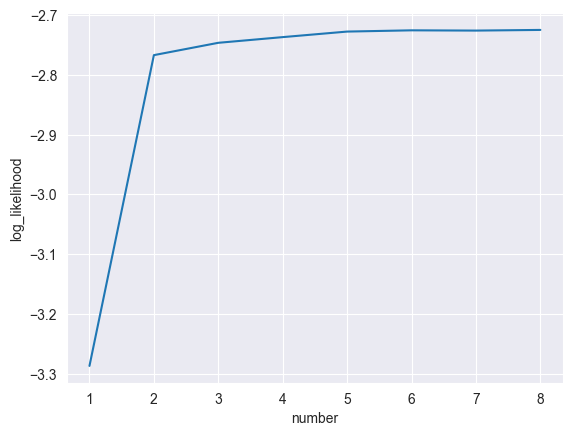

In [19]:
# Higher is better
sns.set_style("darkgrid")
sns.lineplot(data = result_binary_numcl, 
             x = 'number', 
             y = 'log_likelihood')

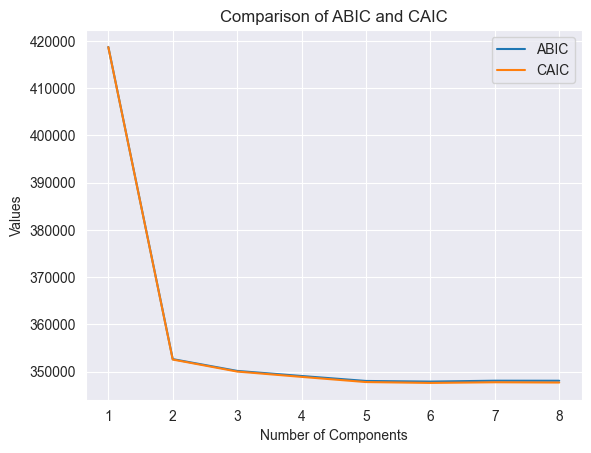

In [20]:
# Lower is better
sns.set_style("darkgrid")
# Create the line plot for ABIC
sns.lineplot(data=result_binary_numcl, x='number', y='abic', label='aBIC')

# Add another line for CAIC
sns.lineplot(data=result_binary_numcl, x='number', y='caic', label='cAIC')

# Add labels and title
plt.xlabel('Number of Classes')
plt.ylabel('Values')
plt.title('Comparison of aBIC and cAIC across classes''All binary indicators')
plt.legend()  # Show the legend to differentiate the lines

# Show the plot
plt.show()

In [22]:
# VALIDATE NUMBER OF COMPONENTS WITH THE BLRT

# Parametric Bootstrapped Likelihood Ratio Test for testing the number of components
# compare a model with  𝑘  components to a model with  𝑘+1  components
# low p-value: k-component model is unlikely model of data compared to k+1 component model
binary_base3ml = StepMix(
    n_components = 5, 
    n_steps = 3,
    correction = 'ML',
    measurement = 'binary_nan',   
    verbose = 0, 
    n_init = r,
    max_iter = m,
    random_state = seed)

# Run BLRT sweep from 5 class to 6 classes
# EXPECT SOME CONVERGENCE WARNINGS!
p_val_binary = blrt_sweep(
    binary_base3ml, X_bin, 
    low = 5, 
    high = 7, 
    n_repetitions = 10) # recommended: at least n = 100
p_val_binary

Testing 5 vs. 6 classes...
Fitting StepMix...


Initializations (n_init) : 100%|████████████████| 5/5 [04:50<00:00, 58.10s/it, max_LL=-1.74e+5, max_avg_LL=-2.73]


Fitting StepMix...


Initializations (n_init) : 100%|███████████████| 5/5 [08:35<00:00, 103.06s/it, max_LL=-1.74e+5, max_avg_LL=-2.73]


Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    : 100%|█| 10/10 [37:49<00:00, 226.95s/it, max_LL=-1.77e+5, median_LL=-1.78e+5, min_LL=-1



Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    :   0%|                                                          | 0/10 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Bootstrap Repetitions    :  10%| | 1/10 [09:14<1:23:07, 554.14s/it, max_LL=-1.78e+5, median_LL=-1.78e+5, min_LL=-/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Bootstrap Repetitions    :  20%|▏| 2/10 [18:14<1:12:46, 545.82s/it, max_LL=-1.78e+5, median_LL=-1.78e+5, min_LL=-/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:968: Converg

Testing 6 vs. 7 classes...
Fitting StepMix...


Initializations (n_init) : 100%|████████████████| 5/5 [07:53<00:00, 94.77s/it, max_LL=-1.74e+5, max_avg_LL=-2.73]


Fitting StepMix...


Initializations (n_init) : 100%|███████████████| 5/5 [24:43<00:00, 296.73s/it, max_LL=-1.74e+5, max_avg_LL=-2.73]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Bootstrapping null model...

Bootstrapping estimator...


Bootstrap Repetitions    :   0%|                                                          | 0/10 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Bootstrap Repetitions    :  10%| | 1/10 [08:54<1:20:08, 534.27s/it, max_LL=-1.78e+5, median_LL=-1.78e+5, min_LL=-/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Bootstrap Repetitions    :  30%|▎| 3/10 [24:18<55:30, 475.74s/it, max_LL=-1.77e+5, median_LL=-1.78e+5, min_LL=-1./Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:968: Converg


Bootstrapping alternative model...

Bootstrapping estimator...


Bootstrap Repetitions    :   0%|                                                          | 0/10 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Bootstrap Repetitions    :  10%| | 1/10 [08:15<1:14:16, 495.21s/it, max_LL=-1.78e+5, median_LL=-1.78e+5, min_LL=-/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Bootstrap Repetitions    :  20%|▏| 2/10 [16:35<1:06:24, 498.01s/it, max_LL=-1.78e+5, median_LL=-1.78e+5, min_LL=-/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:968: Converg


BLRT Sweep Results
                   p
Test                
5 vs. 6 classes  0.0
6 vs. 7 classes  1.0


,p
Test,
5 vs. 6 classes,0.0
6 vs. 7 classes,1.0


In [23]:
# Show p-values for number of classes comparisons
p_val_binary

,p
Test,
5 vs. 6 classes,0.0
6 vs. 7 classes,1.0


In [28]:
# GRAPH SETTINGS (order, labels, colors
# (re-use for other class solutions)

# Create a mapping from tuple-based variable names to their new labels
variable_mapping = {
    "('binary_nan', 'pis', 'cnf_lca')": 'Conflict',
    "('binary_nan', 'pis', 'mon_lca')": 'Money',
    "('binary_nan', 'pis', 'sup_lca')": 'Support',
    "('binary_nan', 'pis', 'tra_lca')": 'Proximity',
    "('binary_nan', 'pis', 'clo_lca')": 'Closeness',
    "('binary_nan', 'pis', 'cnt_lca')": 'Contact'
}

# Define the desired order of variables as per the tuples
desired_order = [
    "('binary_nan', 'pis', 'tra_lca')",   # Proximity
    "('binary_nan', 'pis', 'cnt_lca')",   # Contact
    "('binary_nan', 'pis', 'clo_lca')",   # Closeness
    "('binary_nan', 'pis', 'sup_lca')",   # Support
    "('binary_nan', 'pis', 'mon_lca')",   # Money
    "('binary_nan', 'pis', 'cnf_lca')"    # Conflict
]

# Okabe-Ito color palette (8 colors)
okabe_ito_colors = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#000000"]

In [25]:
# PARAMETERS

binary_6_3ml = StepMix(
    n_components = 6, 
    n_steps = 3,
    correction = 'ML',
    measurement = 'binary_nan',   
    verbose = 0, 
    n_init = r,
    max_iter = m,
    random_state = seed)

binary_6_3ml.fit(X_bin)

Fitting StepMix...


Initializations (n_init) : 100%|███████████████| 5/5 [08:41<00:00, 104.25s/it, max_LL=-1.74e+5, max_avg_LL=-2.73]


StepMix(correction='ML', max_iter=3000, measurement='binary_nan',
        n_components=6, n_init=5, n_steps=3, random_state=240792)

In [26]:
# Class weights
cw = binary_6_3ml.get_cw_df()

cw.round(2)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:1234: FutureWarning: The provided callable <function mean at 0x1064689a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


class_no,0,1,2,3,4,5
param,,,,,,
class_weights,0.16,0.07,0.08,0.04,0.58,0.08


In [30]:
# 1. Measurement parameters
mm = binary_6_3ml.get_mm_df()

# 2. Filter out only rows for `pis` (binary variables) and `means` (continuous variables)
# We are assuming that the `variable` column contains the variable names, and the `type` column
# indicates whether it's a "pis" or "means".

# Filter for pis (binary variables)
pis_df = mm[mm.index.get_level_values('param') == 'pis']

# Filter for means (continuous variables)
means_df = mm[mm.index.get_level_values('param') == 'means']

# 3. Concatenate pis and means into a single DataFrame
filtered_df = pd.concat([pis_df, means_df])

# 4. Print or inspect the resulting DataFrame
print(filtered_df)

# Check the structure of the DataFrame
print(f"Columns (should be the classes): {filtered_df.columns}")
print(f"Index (should be the variables): {filtered_df.index}")

# If the index or columns are tuples, convert them to strings for plotting
filtered_df.columns = filtered_df.columns.map(str)  # Convert column labels (classes) to strings
filtered_df.index = filtered_df.index.map(str)  # Convert index labels (variables) to strings

class_no                          0             1         2         3  \
model_name param variable                                               
binary_nan pis   clo_lca   0.927801  1.072954e-01  0.581314  0.081331   
                 cnf_lca   0.249939  4.309905e-01  0.097627  0.828425   
                 cnt_lca   0.994471  3.970311e-01  0.175539  0.680325   
                 mon_lca   0.000005  9.706697e-16  0.068527  0.335965   
                 sup_lca   0.716133  8.643783e-02  0.734681  0.692575   
                 tra_lca   0.562185  9.740253e-01  0.238176  0.504575   

class_no                          4         5  
model_name param variable                      
binary_nan pis   clo_lca   0.041325  0.961070  
                 cnf_lca   0.195497  0.343575  
                 cnt_lca   0.043306  0.987812  
                 mon_lca   0.002590  0.792163  
                 sup_lca   0.064861  0.970317  
                 tra_lca   0.127047  0.608574  
Columns (should be the classes)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:1224: FutureWarning: The provided callable <function mean at 0x1064689a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


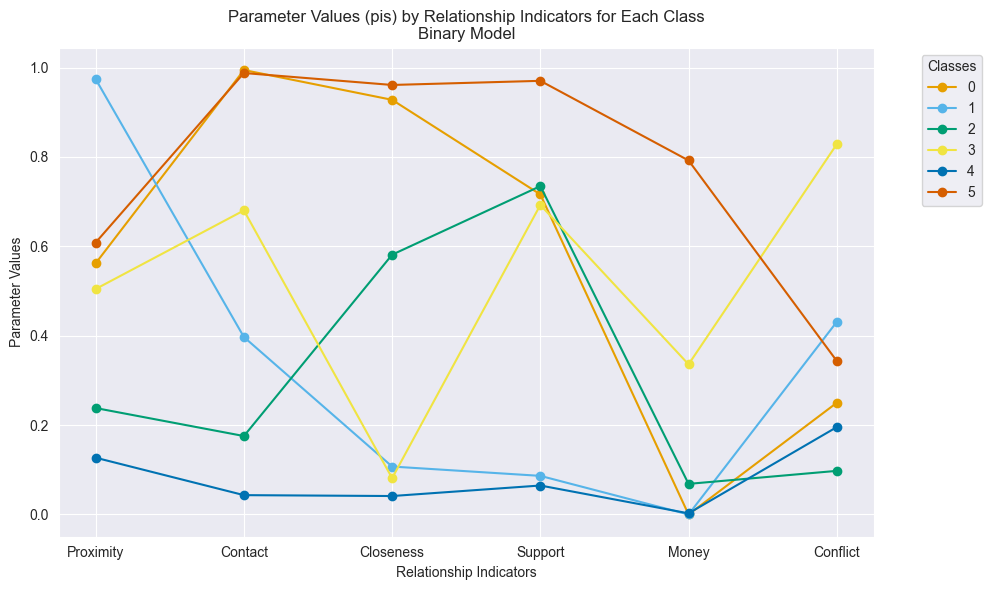

In [31]:
# Reorder the DataFrame based on the actual order of variables
df_plot = filtered_df.loc[desired_order]

# Rename the index (variables) to the new labels using the mapping
df_plot.index = df_plot.index.map(variable_mapping)

# Create a line plot for each class (each column in the DataFrame)
plt.figure(figsize=(10, 6))  # Set figure size

# Plot one line for each class, using the Okabe-Ito color palette
for i, col in enumerate(df_plot.columns):
    plt.plot(df_plot.index, df_plot[col], label=col, marker='o', color=okabe_ito_colors[i % len(okabe_ito_colors)])

# Customize the plot
plt.title('Parameter Values (pis) by Relationship Indicators for Each Class\n'
         'Binary Model')
plt.xlabel('Relationship Indicators')
plt.ylabel('Parameter Values')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if necessary
plt.legend(title='Classes', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cutoffs
plt.show()

In [32]:
# PARAMETERS

binary_5_3ml = StepMix(
    n_components = 5, 
    n_steps = 3,
    correction = 'ML',
    measurement = 'binary_nan',   
    verbose = 0, 
    n_init = r,
    max_iter = m,
    random_state = seed)

binary_5_3ml.fit(X_bin)

Fitting StepMix...


Initializations (n_init) : 100%|████████████████| 5/5 [04:58<00:00, 59.64s/it, max_LL=-1.74e+5, max_avg_LL=-2.73]


StepMix(correction='ML', max_iter=3000, measurement='binary_nan',
        n_components=5, n_init=5, n_steps=3, random_state=240792)

In [33]:
# Class weights
cw = binary_5_3ml.get_cw_df()

cw.round(2)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:1234: FutureWarning: The provided callable <function mean at 0x1064689a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


class_no,0,1,2,3,4
param,,,,,
class_weights,0.6,0.17,0.09,0.09,0.04


In [34]:
# 1. Measurement parameters
mm = binary_5_3ml.get_mm_df()

# 2. Filter out only rows for `pis` (binary variables) and `means` (continuous variables)
# We are assuming that the `variable` column contains the variable names, and the `type` column
# indicates whether it's a "pis" or "means".

# Filter for pis (binary variables)
pis_df = mm[mm.index.get_level_values('param') == 'pis']

# Filter for means (continuous variables)
means_df = mm[mm.index.get_level_values('param') == 'means']

# 3. Concatenate pis and means into a single DataFrame
filtered_df = pd.concat([pis_df, means_df])

# 4. Print or inspect the resulting DataFrame
print(filtered_df)

# Check the structure of the DataFrame
print(f"Columns (should be the classes): {filtered_df.columns}")
print(f"Index (should be the variables): {filtered_df.index}")

# If the index or columns are tuples, convert them to strings for plotting
filtered_df.columns = filtered_df.columns.map(str)  # Convert column labels (classes) to strings
filtered_df.index = filtered_df.index.map(str)  # Convert index labels (variables) to strings

class_no                          0         1             2         3  \
model_name param variable                                               
binary_nan pis   clo_lca   0.030309  0.980820  4.988054e-01  0.799794   
                 cnf_lca   0.206028  0.310526  3.547090e-01  0.074407   
                 cnt_lca   0.023788  0.984678  8.572570e-01  0.480865   
                 mon_lca   0.003121  0.379013  2.666391e-11  0.053705   
                 sup_lca   0.083886  0.977082  1.680520e-01  0.650475   
                 tra_lca   0.173696  0.619459  6.945718e-01  0.216510   

class_no                          4  
model_name param variable            
binary_nan pis   clo_lca   0.106155  
                 cnf_lca   0.751761  
                 cnt_lca   0.675443  
                 mon_lca   0.354846  
                 sup_lca   0.722879  
                 tra_lca   0.527782  
Columns (should be the classes): Index([0, 1, 2, 3, 4], dtype='int64', name='class_no')
Index (should be the va

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:1224: FutureWarning: The provided callable <function mean at 0x1064689a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


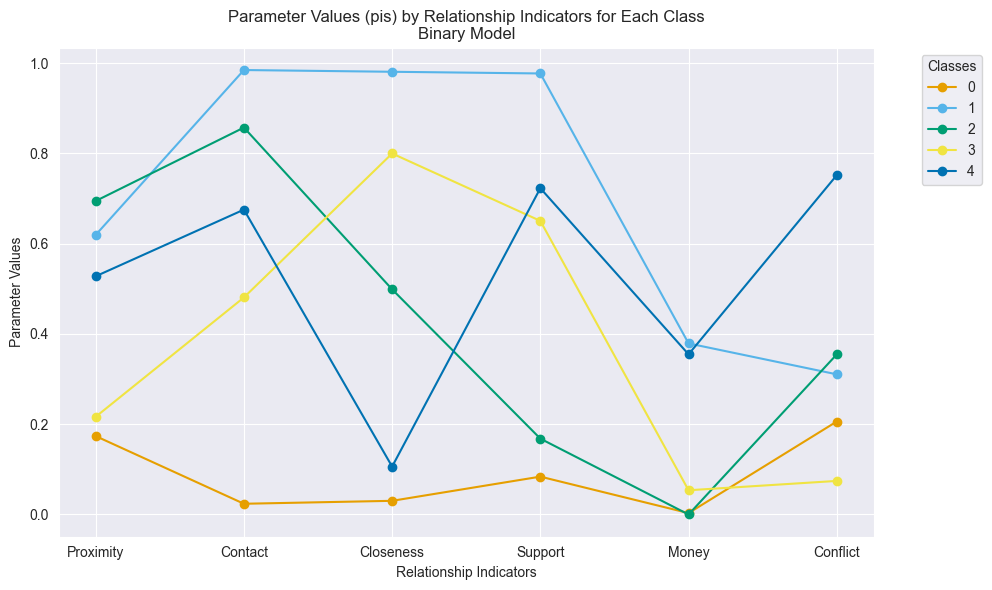

In [35]:
# Reorder the DataFrame based on the actual order of variables
df_plot = filtered_df.loc[desired_order]

# Rename the index (variables) to the new labels using the mapping
df_plot.index = df_plot.index.map(variable_mapping)

# Create a line plot for each class (each column in the DataFrame)
plt.figure(figsize=(10, 6))  # Set figure size

# Plot one line for each class, using the Okabe-Ito color palette
for i, col in enumerate(df_plot.columns):
    plt.plot(df_plot.index, df_plot[col], label=col, marker='o', color=okabe_ito_colors[i % len(okabe_ito_colors)])

# Customize the plot
plt.title('Parameter Values (pis) by Relationship Indicators for Each Class\n'
         'Binary Model')
plt.xlabel('Relationship Indicators')
plt.ylabel('Parameter Values')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if necessary
plt.legend(title='Classes', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cutoffs
plt.show()

In [ ]:
# Append class membership to dataframe
df['continuous_pred'] = model.predict(df)

In [ ]:
# Export dataframe to csv
df.to_csv('../data/bla.csv')